# Company Bankruptcy Data Analysis
Company Bankruptcy Prediction, Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

Hypothetical Business question : Stakeholders of bank would want to identify companies that would potentially be bankrupt. (And avoid doing business / loans..etc)  

Agenda:
>- To build a model to predict if company would go bankrupt
>- Perform dimensionality reduction and understand weights of features
>- Perform clustering analysis to find patterns within unlabelled data

Source : https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction  
Date retrieved : July 2021

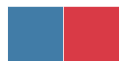

In [1]:
# for data
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# better view for wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
pd.set_option('display.max_columns', 100) # dataset has 90+ columns
pd.set_option('display.max_rows', 100)

# customize color scheme
sns.set_style("darkgrid")
palette = sns.diverging_palette(240, 10, n=2)
sns.palplot(palette)
# Setting palette (confirm to use palette)
sns.set_palette(palette)

In [2]:
# import data
df=pd.read_csv('company_bankruptcy.csv')

In [3]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [4]:
df.shape

(6819, 96)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
# Checking classifier if binary or multi-class

df['Bankrupt?'].unique()

array([1, 0], dtype=int64)

### Observations:  
>- Classifier is Bankrupt? and it is a binary classification of 1 and 0. Where 0 is not bankrupt, 1 is bankrupt.
>- 95 numerical features !  
***

In [7]:
# descriptive stats on numerical features

# data seems to have already been scaled, via min max as min is 0 and max is 1
# Not all data have been scaled correctly, need to take this into consideration when performing PCA.
# Net Income flag seems to only have 1 value.

df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

In [8]:
# checking the number of unqiue values per column ( looking especially for values of 1 as they will not provide any information for model)

{column: len(df[column].unique()) for column in df.columns if len(df[column].unique()) == 1}

{' Net Income Flag': 1}

In [9]:
# Dropping columns

df = df.drop(" Net Income Flag", axis = 1)

In [10]:
df.shape

(6819, 95)

In [11]:
# Check for null values

df.isnull().sum().any()

False

In [12]:
# no exact same rows / duplicates

print(f'total duplicate rows: {df.duplicated().sum()}')

total duplicate rows: 0


***
# EDA

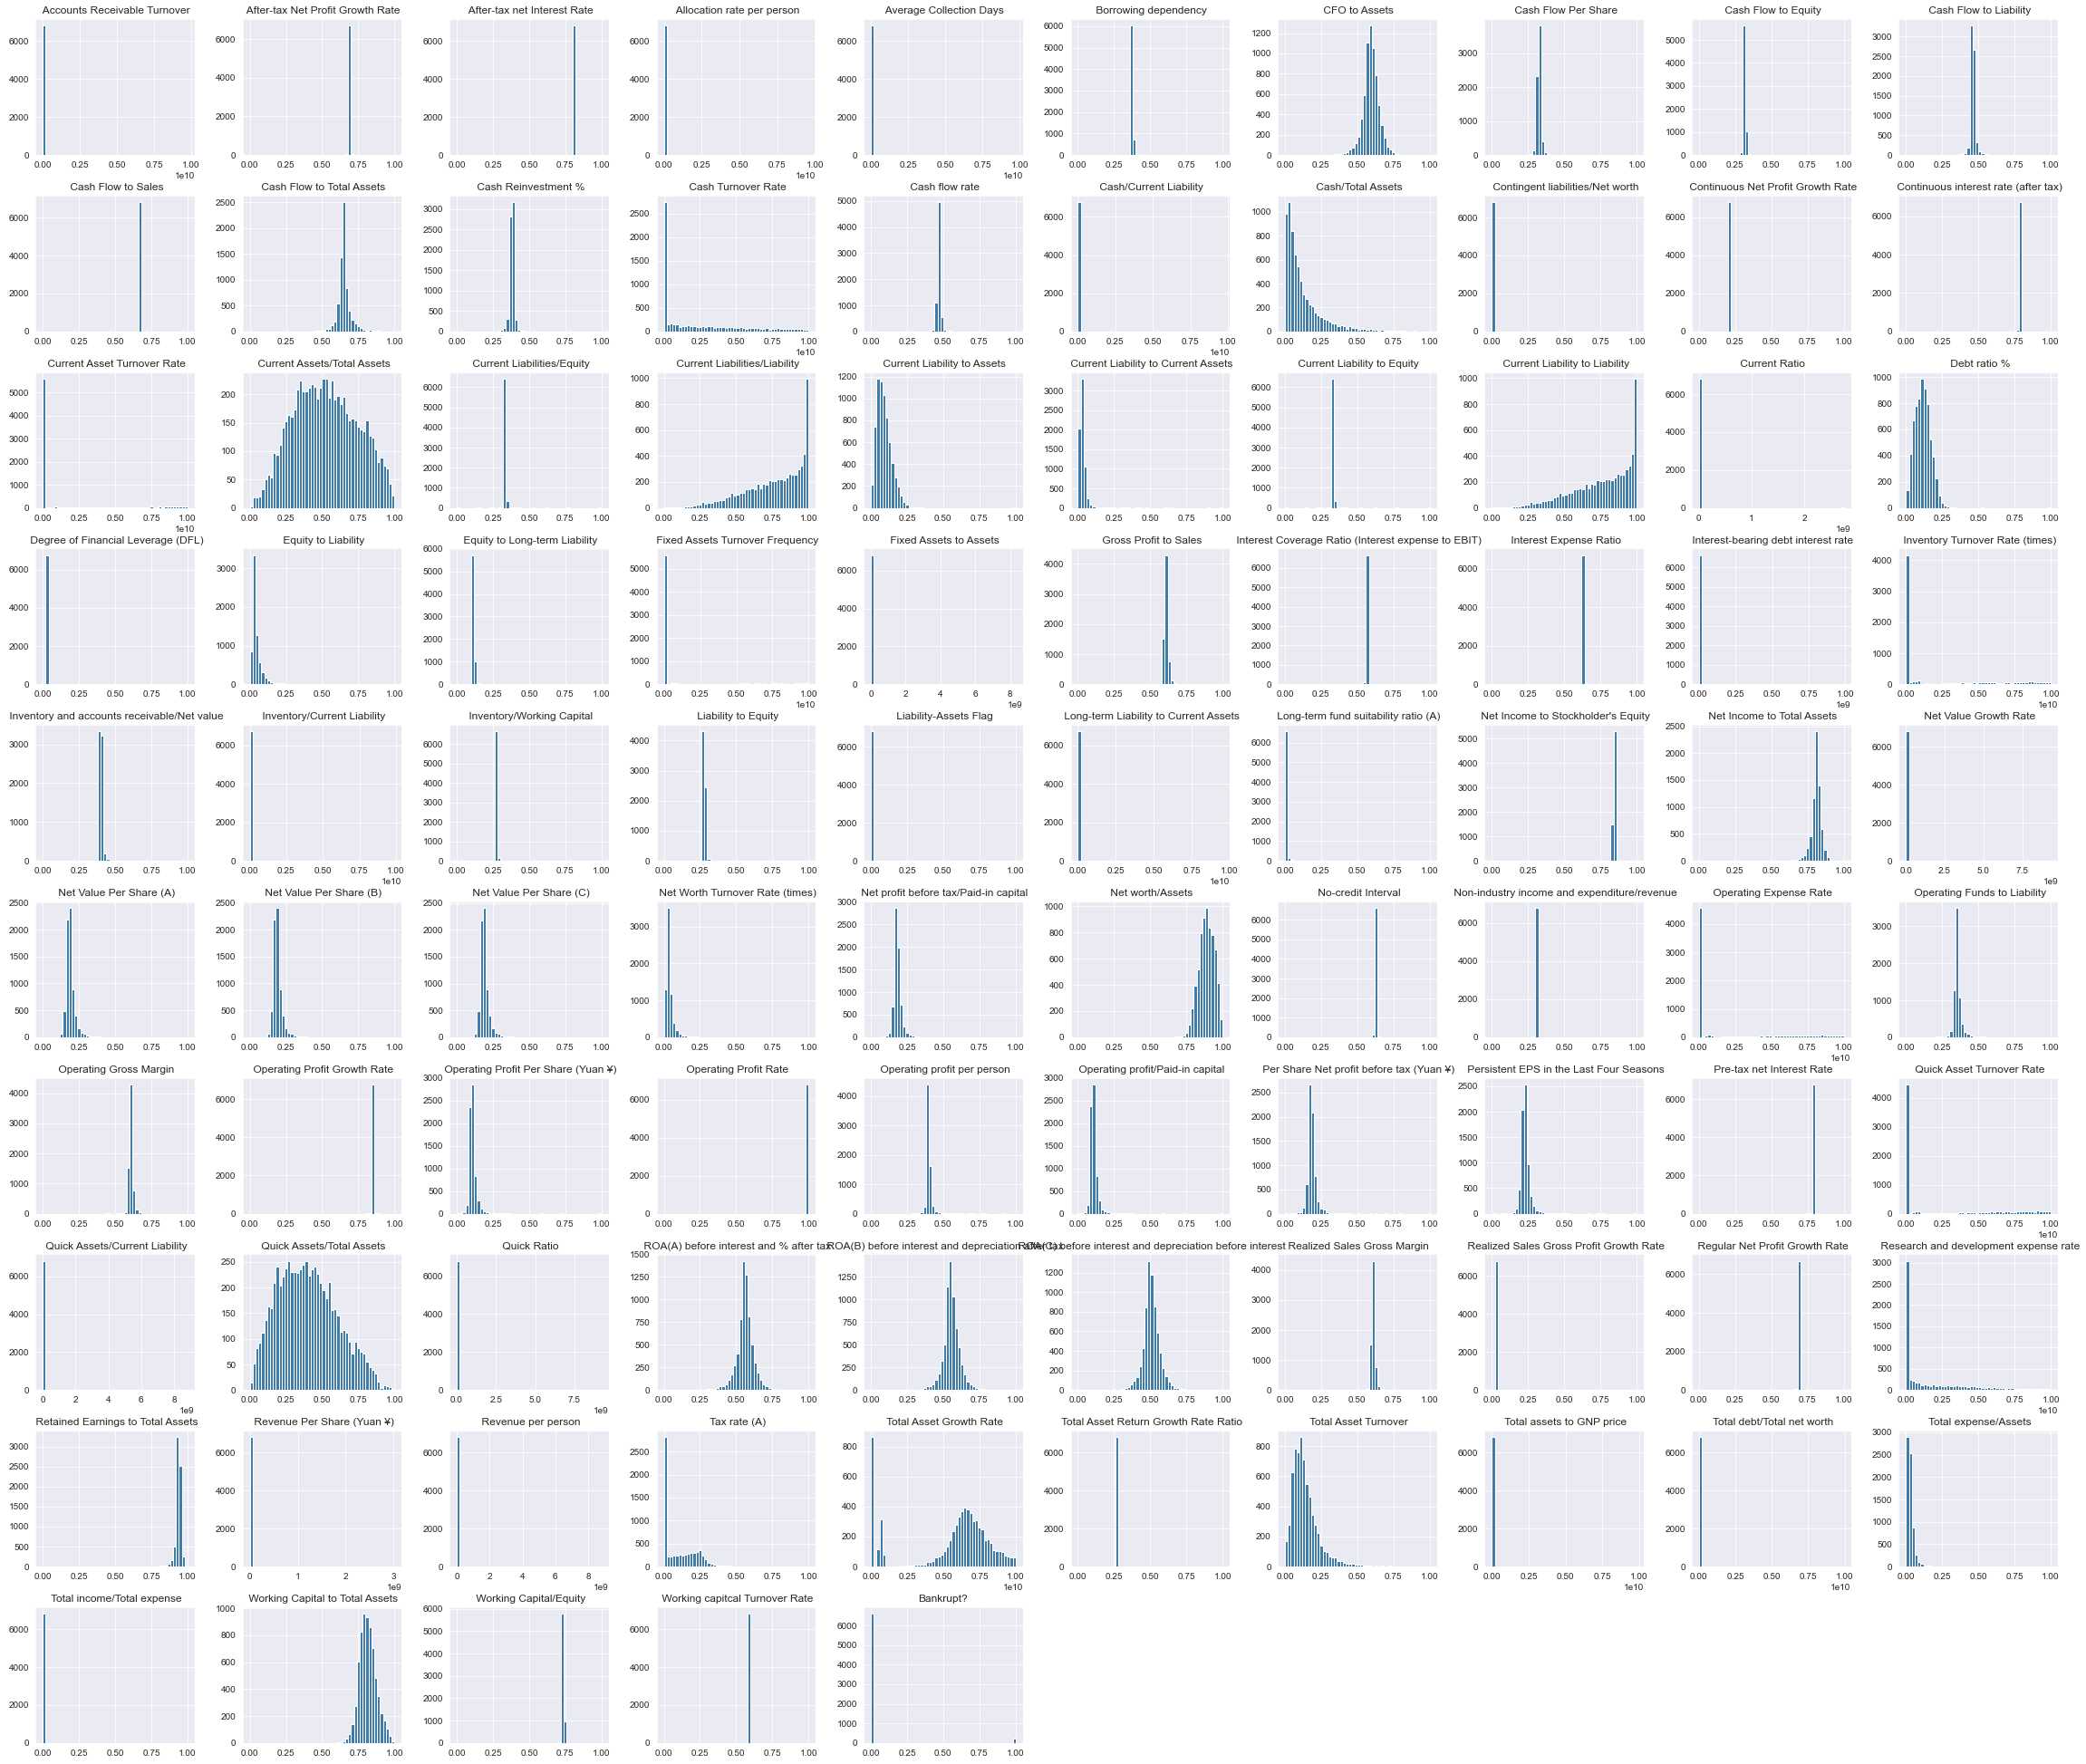

In [13]:
# Histogram

# Alot of potential outliers, many of them seem to be concentrated in a single bin.

df.hist(bins=50,figsize=(40, 35))
plt.show()

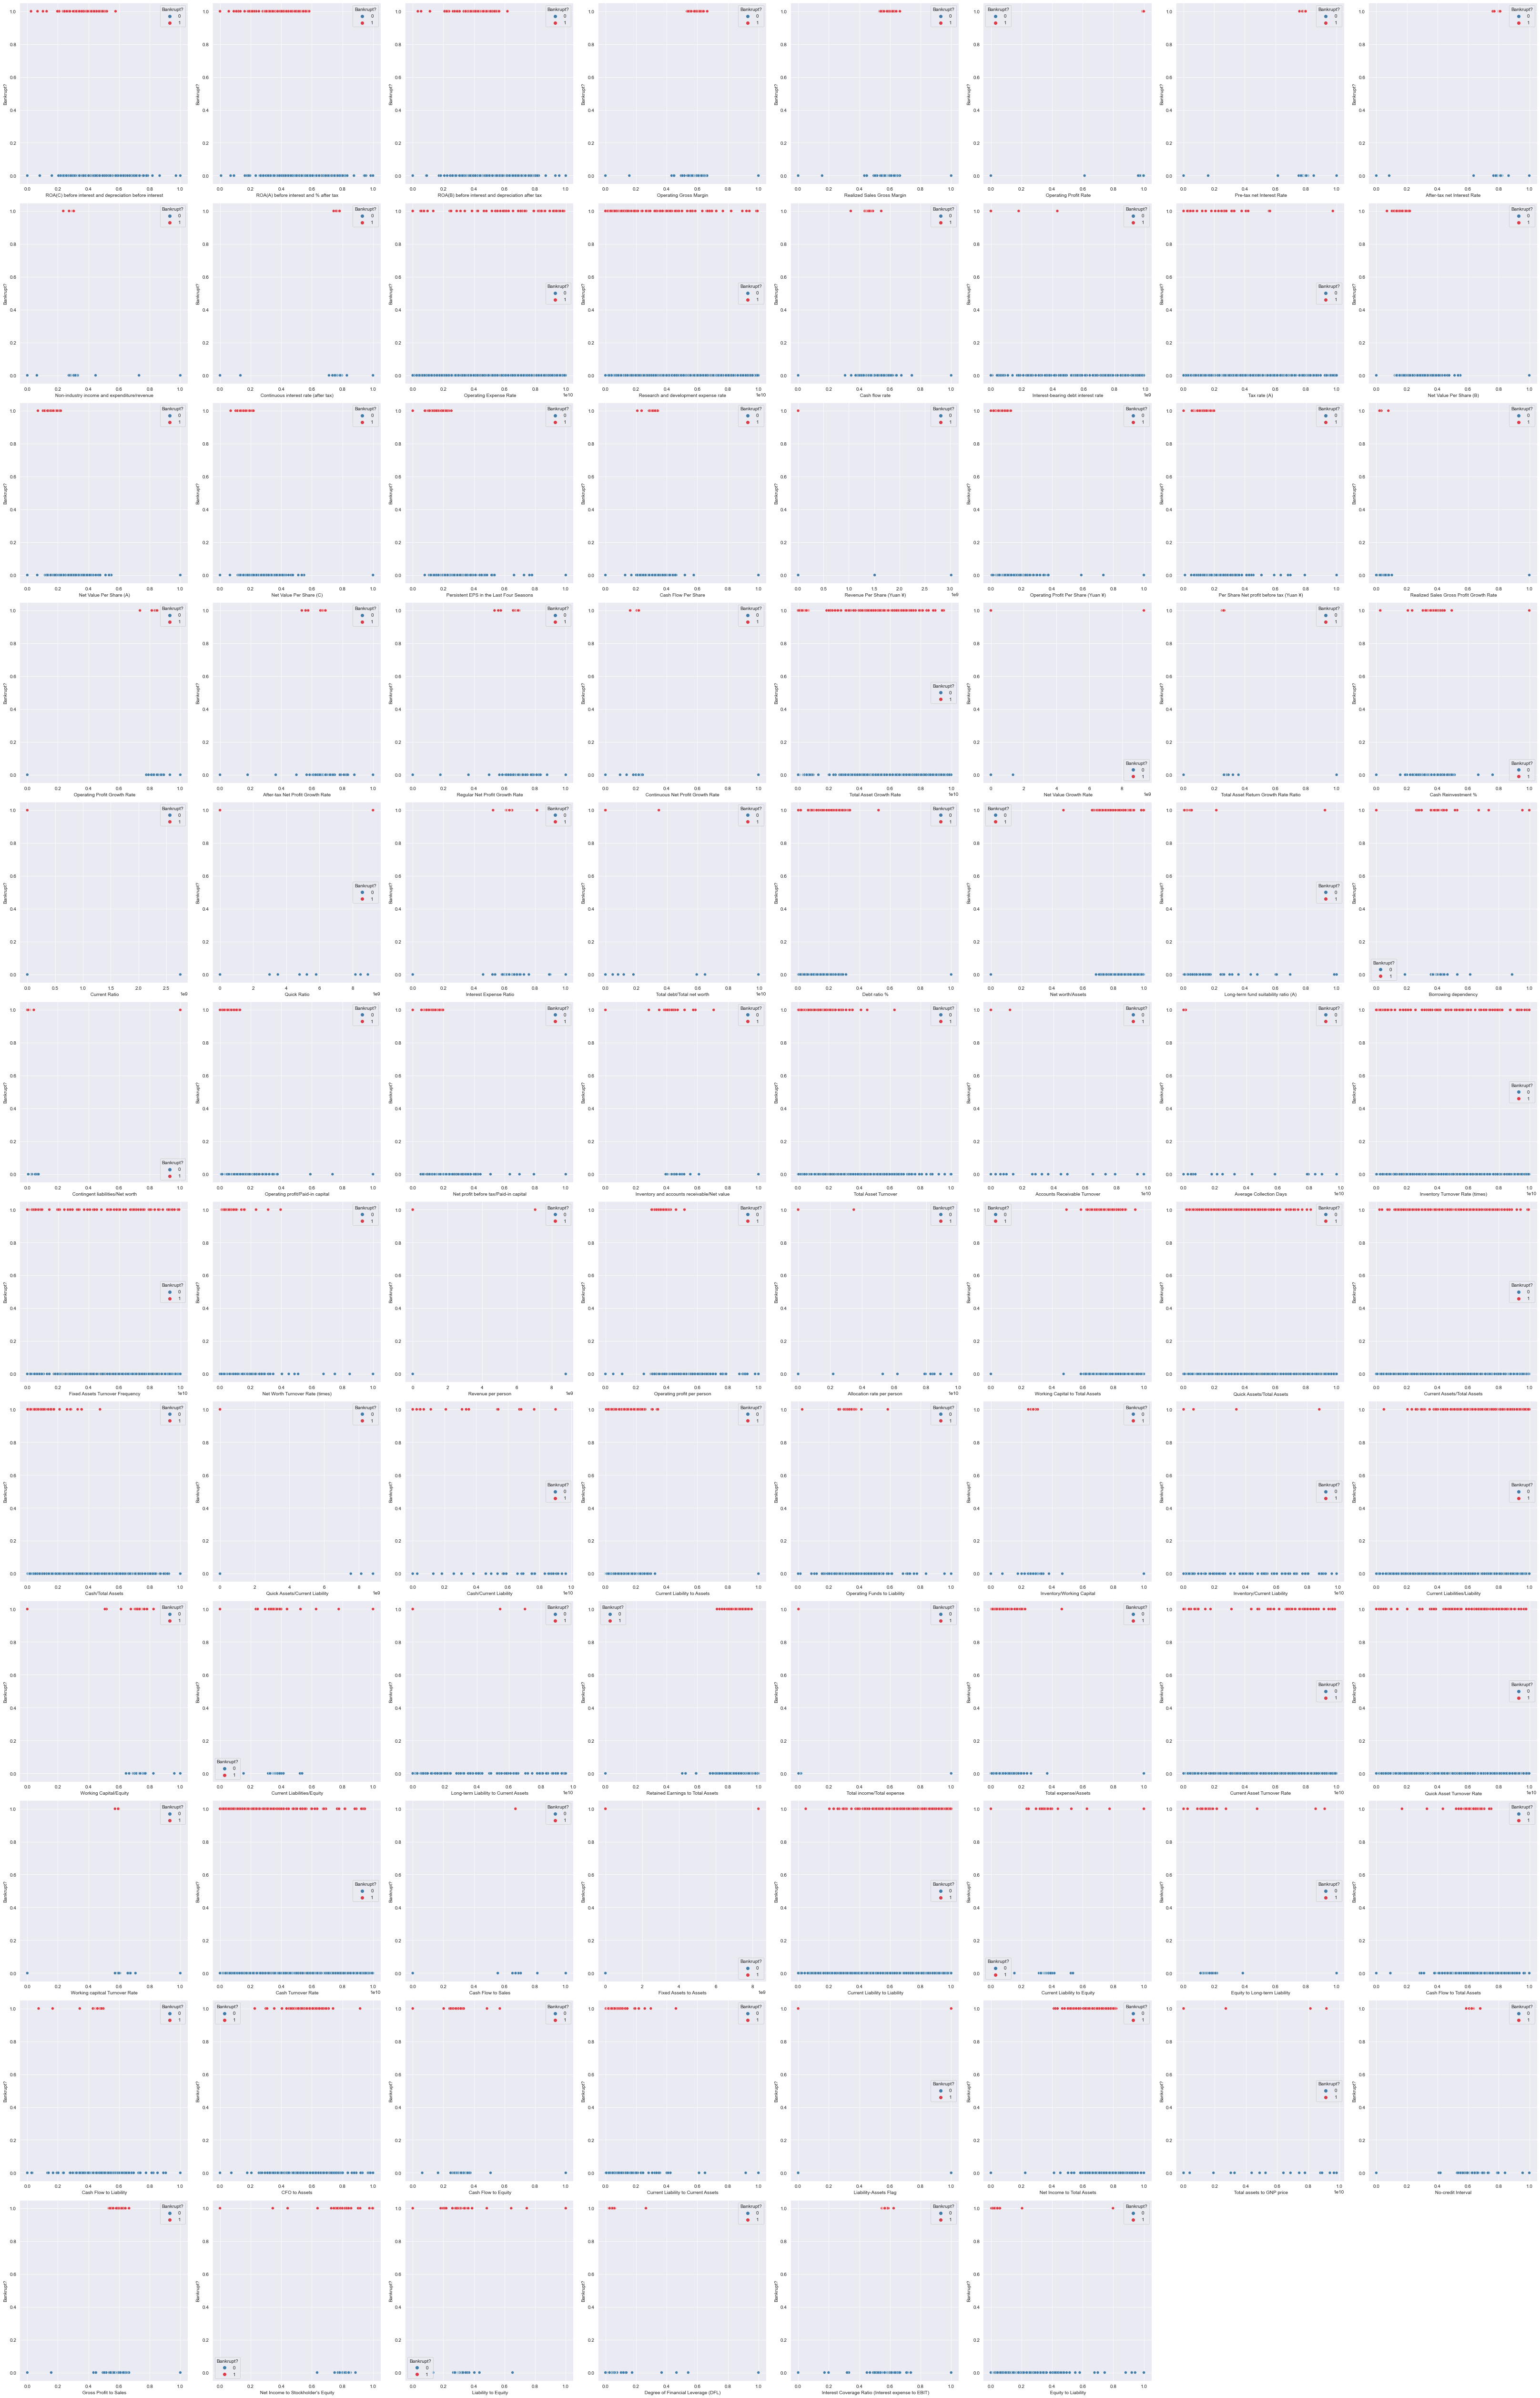

In [14]:
# Scatterplot

fig=plt.figure(figsize=(45,70))
   
for i,cat in enumerate(df.drop(['Bankrupt?'], axis=1).columns):
    ax = plt.subplot(12,8,i+1)
    sns.scatterplot(x=df[cat], y=df['Bankrupt?'], hue=df['Bankrupt?'])
    plt.tight_layout()

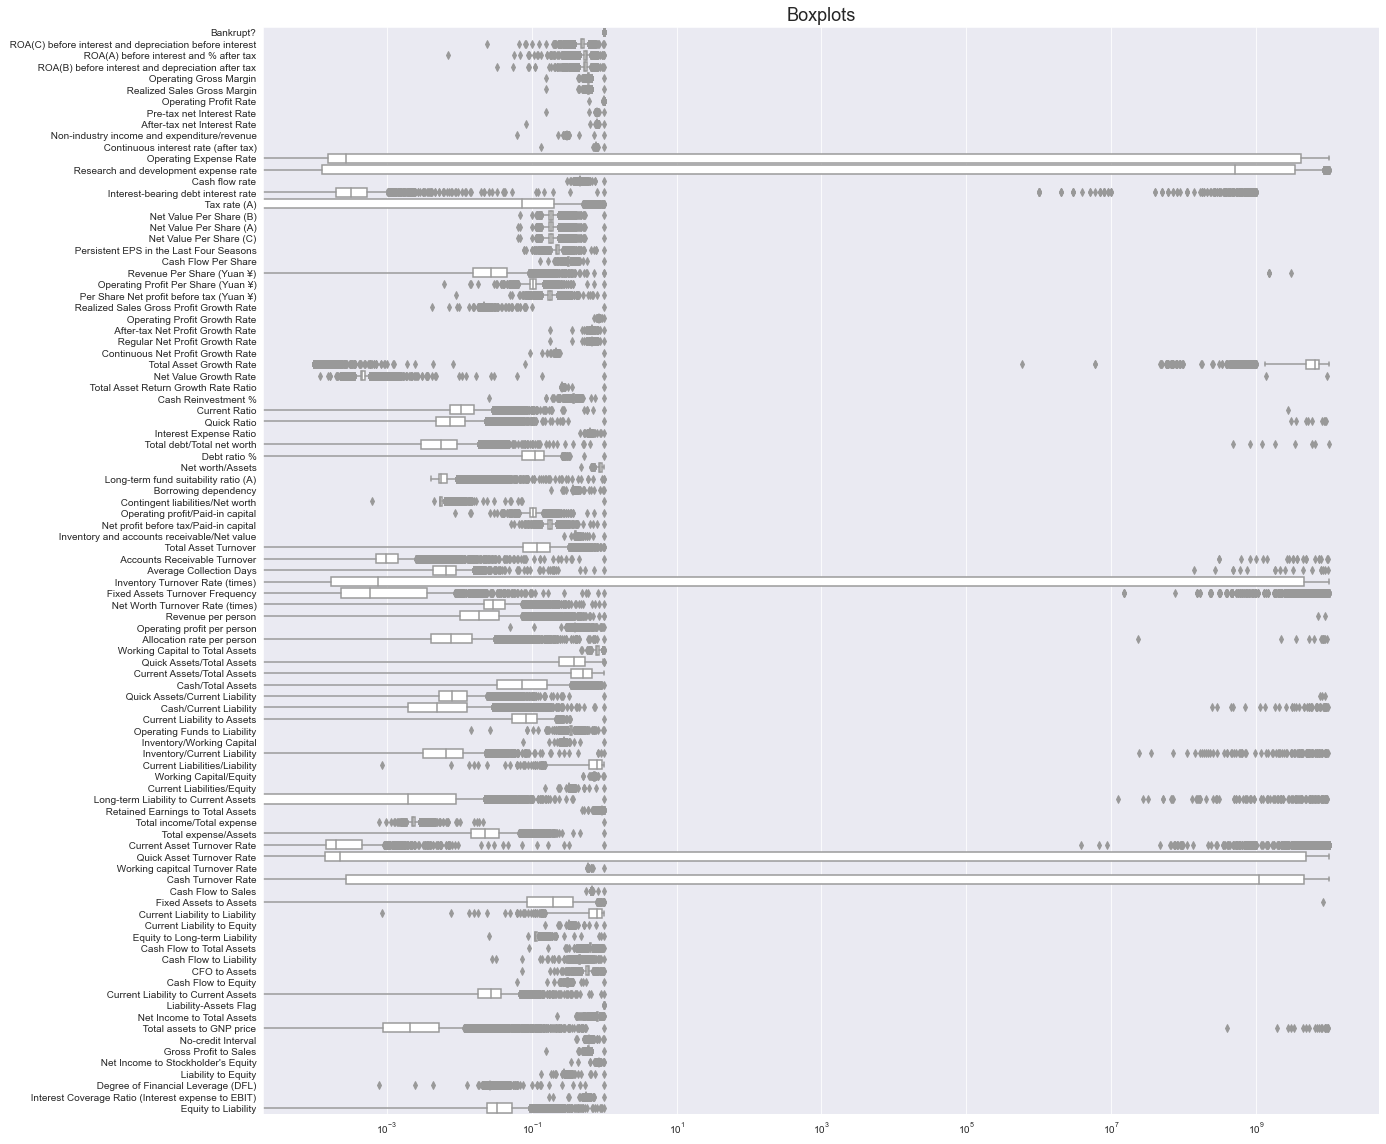

In [15]:
# Plotting Boxplots of the numerical features

# From the histogram, data is skewed and therefore we use log scale to explore boxplots
# From the Boxplots, we can clearly see the amount of outliers.


plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h", color="white")
ax.set_title('Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

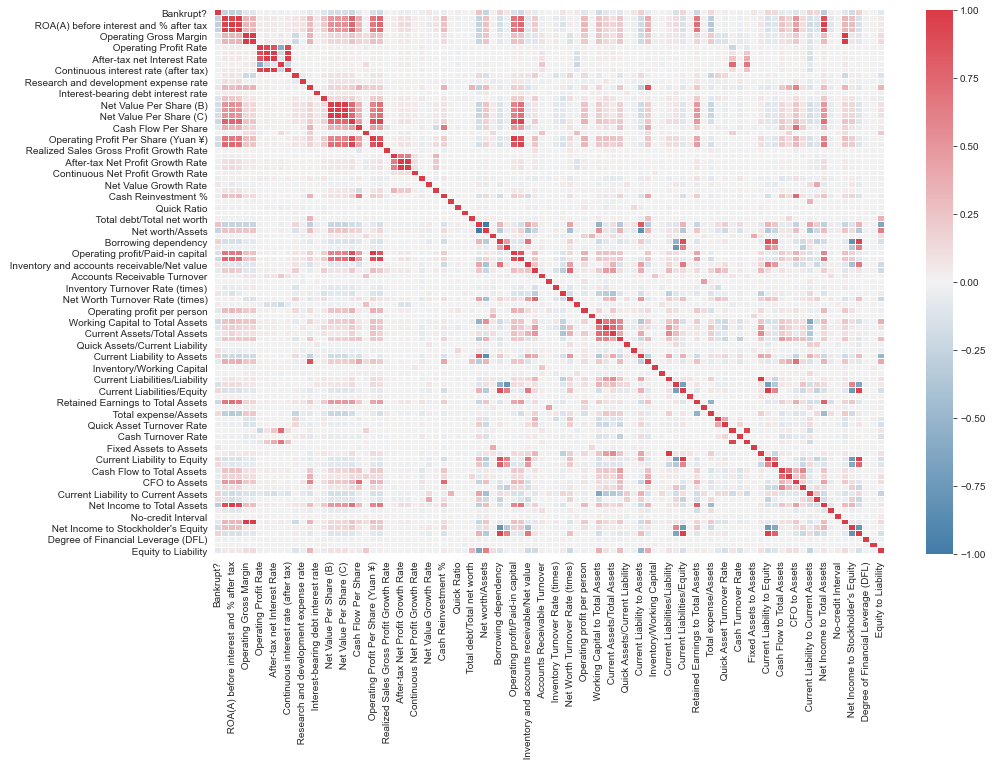

In [16]:
# Correlation Matrix

# Many correlated variables

fig=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap = sns.diverging_palette(240, 10, as_cmap=True), linewidth = 0.005)

In [17]:
# Class imbalance
# 0 = Not Bankrupt or Financially stable
# 1 = Bankrupt or Financially unstable

df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [18]:
# Percentage of Bankrupt 

stable_counts = len(df[df["Bankrupt?"]==0])
unstable_counts = len(df[df["Bankrupt?"]==1])
total = len(df["Bankrupt?"])
pct_stable_counts_sub = (stable_counts/total) * 100
print('percentage not bankrupt is = %.2f' % (pct_stable_counts_sub),"%")
pct_unstable_sub = (unstable_counts/total) * 100
print('percentage bankrupt is = %.2f' % (pct_unstable_sub),"%")

percentage not bankrupt is = 96.77 %
percentage bankrupt is = 3.23 %


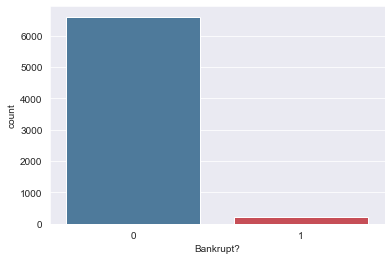

In [19]:
# Bar graph

# With such a low percentage, undersampling may not be feasible as we may have to remove alot of data from class 0.

sns.countplot(x="Bankrupt?", data=df)
plt.show()

The highly imbalance classes will lead to a preference of predicting 0 when running model.

# Preprocessing

In [20]:
# Outlier UDF

def outlier_removal(column):
    Q1,Q3=np.quantile(column,[0.25,0.75])
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    return Lower_Whisker, Upper_Whisker

In [21]:
# Split X and y

y = df['Bankrupt?'].copy()    # pandas series
X = df.drop('Bankrupt?', axis=1).copy()    #pandas df

In [22]:
# Outlier removal, replace outlier values with Upper and Lower whisker values

for column in X.columns:
    lower, upper = outlier_removal(X[column])
    X[column] = np.where(X[column]>upper, upper,X[column])
    X[column] = np.where(X[column]<lower,lower,X[column])

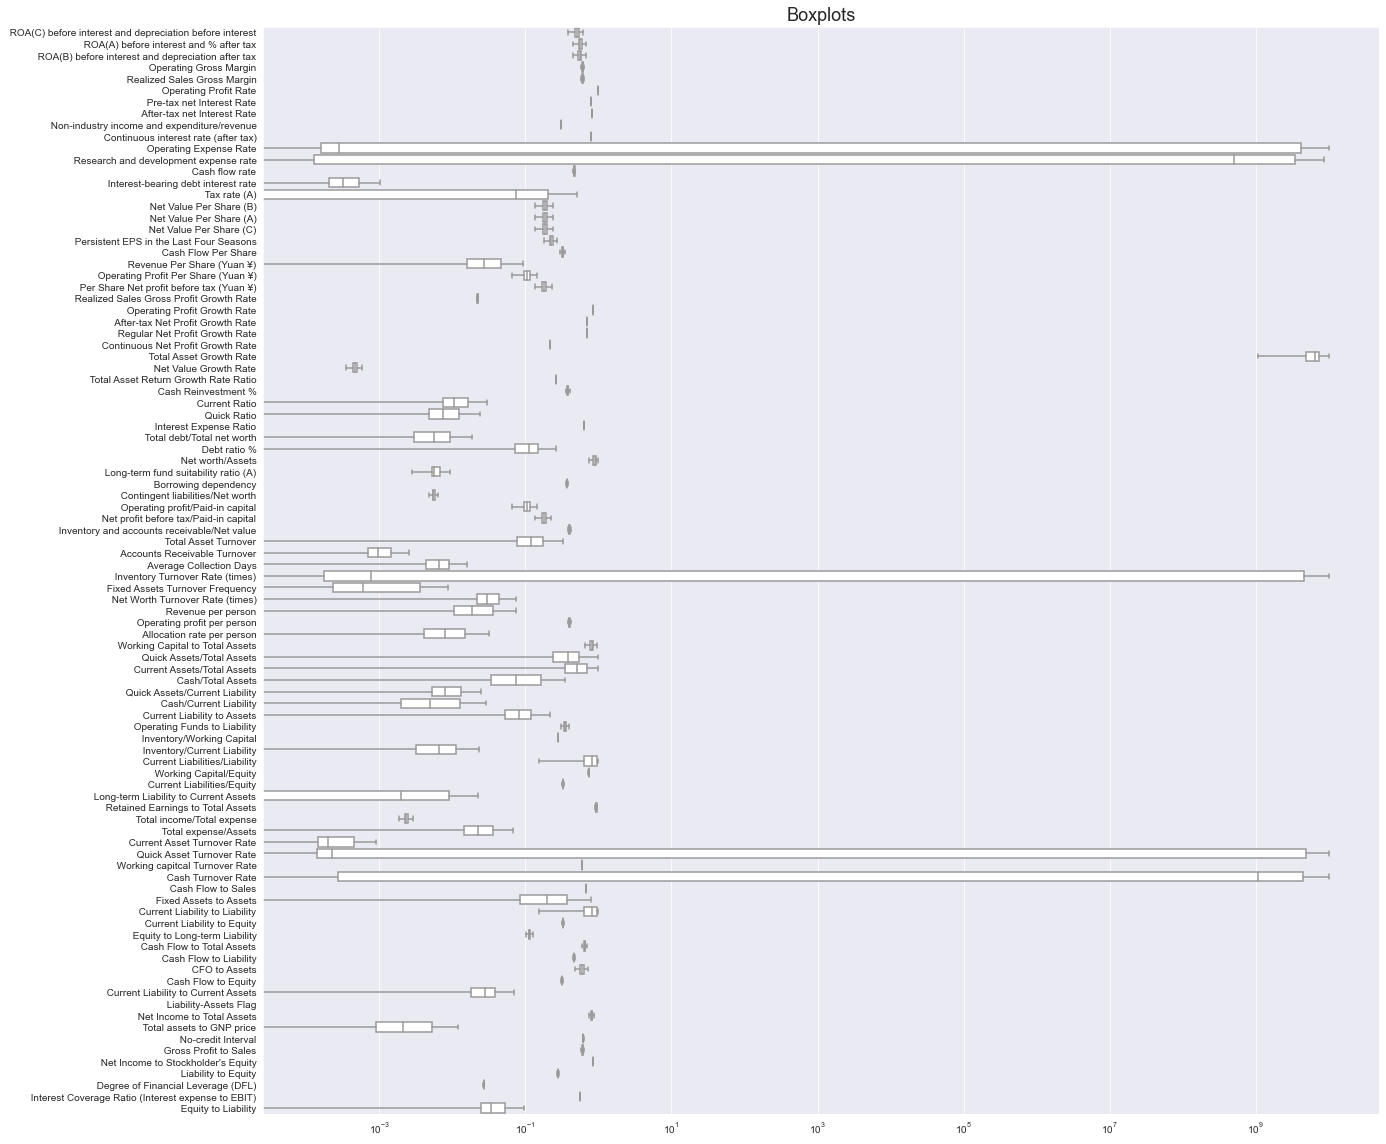

In [23]:
# Boxplot to see changes of outliers

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = X, orient="h", color="white")
ax.set_title('Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [24]:
# Train test split - 70% train 30% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,stratify=y)

# Scaling X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

Summary: TTS of 70/30, standard scaled and fit to X.

In [25]:
X_train.head()

ROA(C) before interest and depreciation before interest  \
5950                                          -0.550306          
3832                                          -1.811421          
725                                           -0.360379          
2047                                          -0.671859          
3129                                          -0.092582          

       ROA(A) before interest and % after tax  \
5950                                -0.693241   
3832                                -1.701125   
725                                 -0.128347   
2047                                -0.560452   
3129                                -0.257870   

       ROA(B) before interest and depreciation after tax  \
5950                                          -0.550876    
3832                                          -1.721408    
725                                           -0.344624    
2047                                          -0.609349    
3129                                          -0.288277    

       Operating Gross Margin   Realized Sales Gross Margin  \
5950                -0.929154                     -0.971488   
3832                -0.750244                     -0.750863   
725                 -0.395075                     -0.394674   
2047                -1.418837                     -1.421377   
3129                -0.173757                     -0.172720   

       Operating Profit Rate   Pre-tax net Interest Rate  \
5950               -0.736664                   -0.524790   
3832               -1.167405                   -1.266978   
725                -0.115750                    0.250238   
2047               -1.910028                   -0.385402   
3129                0.061110                   -0.211714   

       After-tax net Interest Rate  \
5950                     -0.676298   
3832                     -1.193343   
725                       0.221120   
2047                     -0.380727   
3129                     -0.310745   

       Non-industry income and expenditure/revenue  \
5950                                      0.203991   
3832                                     -0.901826   
725                                       1.005904   
2047                                      1.933299   
3129                                     -0.599883   

       Continuous interest rate (after tax)   Operating Expense Rate  \
5950                              -0.143971                 2.172021   
3832                              -1.210626                -0.611634   
725                                0.006380                -0.611634   
2047                              -0.359473                -0.611634   
3129                              -0.296827                -0.611634   

       Research and development expense rate   Cash flow rate  \
5950                                0.101429        -1.069015   
3832                               -0.113600        -0.241784   
725                                -0.572590         0.514463   
2047                               -0.762598        -2.256673   
3129                                2.036693        -0.237655   

       Interest-bearing debt interest rate   Tax rate (A)  \
5950                             -0.604007      -0.894091   
3832                             -0.421860      -0.894091   
725                               2.349494       0.466964   
2047                              0.714732       1.045513   
3129                             -0.265215       3.236812   

       Net Value Per Share (B)   Net Value Per Share (A)  \
5950                 -0.583581                 -0.581331   
3832                 -0.851388                 -0.848456   
725                  -0.804894                 -0.802080   
2047                 -0.490593                 -0.488579   
3129                 -1.016908                 -1.013554   

       Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
5950                 -0.582633  

# Experiment (1)  
At this stage we will train the model using Logistic Regression without -  
>- 1) Handling imbalance of data
>- 2) Dimensionality Reduction.
>- 3) Tuning of models

In [26]:
# import training models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_precision_recall_curve

# initialise Logistic Regression model with basic parameters
logreg = LogisticRegression(random_state = 1,max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# Print key metrics      
print("Accuracy:", logreg.score(X_test, y_test))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

Accuracy: 0.9682306940371457
F1: 0.32989690721649484
Recall: 0.24242424242424243
Precision: 0.5161290322580645

CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision     0.975186   0.516129  0.968231     0.745658      0.960378
recall        0.992424   0.242424  0.968231     0.617424      0.968231
f1-score      0.983730   0.329897  0.968231     0.656813      0.962638
support    1980.000000  66.000000  0.968231  2046.000000   2046.000000


Observation: We can see that the accuracy score is similar to initial percentage of just guessing 0 (not bankrupt)

Remember class imbalance percentage:  
percentage not bankrupt is = 96.77 %  
percentage bankrupt is = 3.23 %  

We are using recall as our performance metric because we want to make decisions based on whether a company is predicted bankrupt and wish to avoid them. As compared to False positives (Actually not bankrupt but predicted bankrupt), the risk is much higher.Therefore, we are most concerned with minimizing False Negative prediction errors in our model.  With the current recall score of 0.24 now, it indicates a high proportion of False Negatives.  
Accuracy metric will not work well for imbalance classes.  

# Experiment (2)  
At this stage we will train the model after addressing class imbalance.
>- 1) Handling imbalance of data [✓]
>- 2) Dimensionality Reduction.
>- 3) Tuning of models

In [27]:
# Using SMOTE to create synthetic data to oversample the minority class
# We are only oversampling the train data as we do not want these synthetic data to be leaked into test data.
# That is the reason why we only perform class imbalance treatment after TTS.

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1, n_jobs=-1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Original X_train/y_train: {}, {}".format(len(X_train), len(y_train)))
print("Upsampled X_train/y_train: {}, {}".format(len(X_train_sm), len(y_train_sm)))

Original X_train/y_train: 4773, 4773
Upsampled X_train/y_train: 9238, 9238


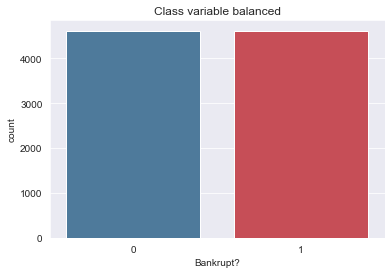

In [28]:
# plot showing the new balance in class

sns.countplot(x=y_train_sm)
plt.title('Class variable balanced');
plt.show()

In [29]:
# initialise Logistic Regression model with basic parameters with SMOTE
logreg2 = LogisticRegression(random_state = 1,max_iter=1000)
logreg2.fit(X_train_sm, y_train_sm)
y_pred = logreg2.predict(X_test)
y_pred_proba = logreg2.predict_proba(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# Print key metrics      
print("Accuracy:", logreg2.score(X_test, y_test))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

Accuracy: 0.8895405669599218
F1: 0.29375
Recall: 0.7121212121212122
Precision: 0.18503937007874016

CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision     0.989397   0.185039  0.889541     0.587218      0.963450
recall        0.895455   0.712121  0.889541     0.803788      0.889541
f1-score      0.940085   0.293750  0.889541     0.616917      0.919235
support    1980.000000  66.000000  0.889541  2046.000000   2046.000000


After class imbalance treatment via oversampling minority class, recall score is much higher, but precision and overall accuracy drops. Initial accuracy was misleading in the first place so that is a good sign.

In [30]:
# Experiment (1)
# CLASSIFICATION REPORT:
#                      0          1  accuracy    macro avg  weighted avg
# precision     0.975186   0.516129  0.968231     0.745658      0.960378
# recall        0.992424   0.242424  0.968231     0.617424      0.968231
# f1-score      0.983730   0.329897  0.968231     0.656813      0.962638
# support    1980.000000  66.000000  0.968231  2046.000000   2046.000000

# Experiment (3)  
Perform PCA Analysis and run on model.
>- 1) Handling imbalance of data [✓]
>- 2) Dimensionality Reduction. [✓]
>- 3) Tuning of models

In [31]:
# PCA with same number of components with original features (94)
from sklearn.decomposition import PCA

pca = PCA()    # n_components=0 will equal same as feature dataset

X_train_pca = pca.fit_transform(X_train_sm)

In [32]:
# get basic info
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance) # calculate cumulative explained variance
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

# DISPLAY info about PCs
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(40))
print('-'*40)

PCA Overview
Total: 94 components
----------------------------------------
Mean explained variance: 0.011
----------------------------------------
    explained variance  cumulative
1             0.364899    0.364899
2             0.103417    0.468316
3             0.084350    0.552667
4             0.043769    0.596435
5             0.036361    0.632796
6             0.032963    0.665759
7             0.030195    0.695955
8             0.028358    0.724313
9             0.023400    0.747713
10            0.020929    0.768642
11            0.017586    0.786228
12            0.017272    0.803500
13            0.013442    0.816942
14            0.012118    0.829059
15            0.010689    0.839748
16            0.010005    0.849753
17            0.009022    0.858775
18            0.008617    0.867392
19            0.007745    0.875137
20            0.007506    0.882643
21            0.007104    0.889748
22            0.006950    0.896697
23            0.006727    0.903424
24           

Observations:  
>- First 2 components has 46% of explained variance.
>- Around 23 components to have 90% explained variance.
>- Around 33 components to have 95% of explained variance.

Limit scree plot to nth component (0 for all) > 0


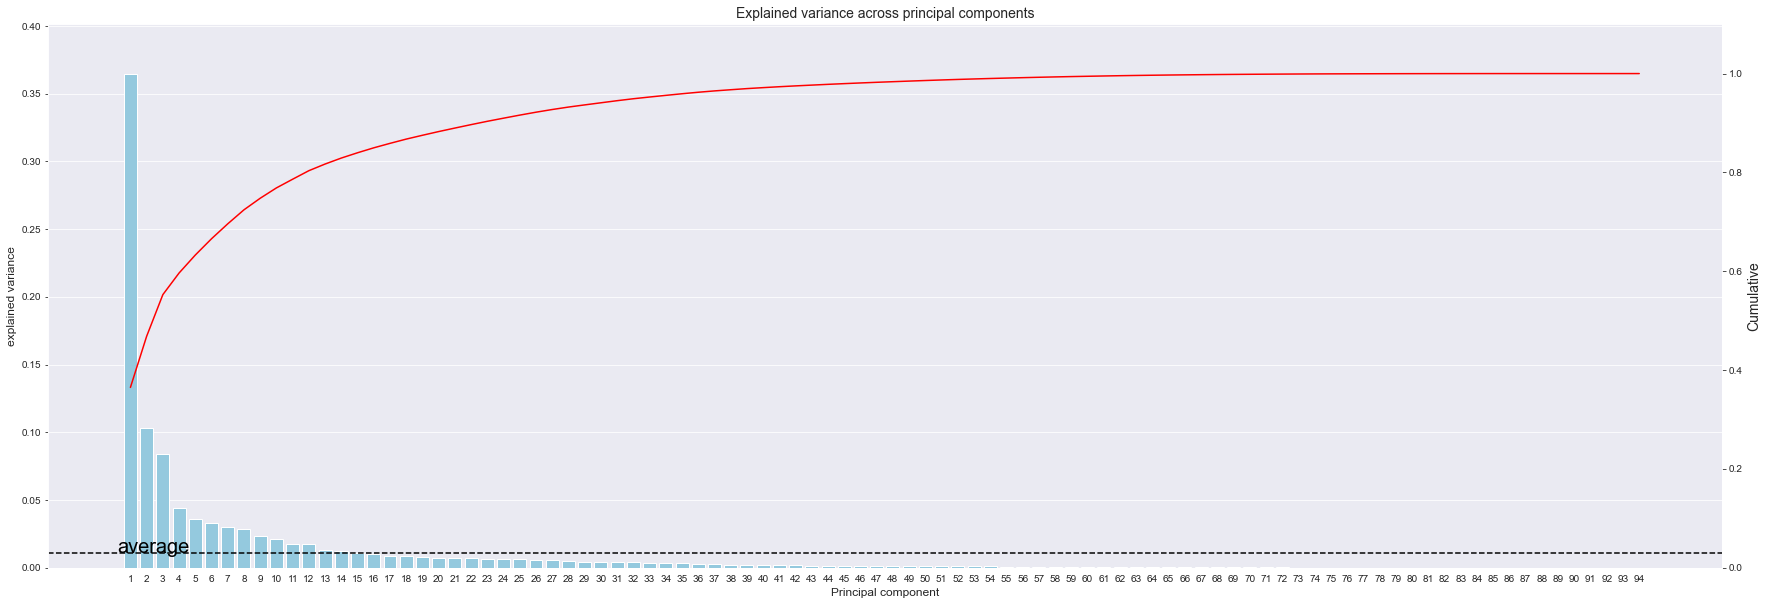

In [33]:
# Scree plot analysis

#limit plot to x PC
limit = int(input("Limit scree plot to nth component (0 for all) > "))
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components

df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]

#make scree plot
fig, ax1 = plt.subplots(figsize=(30,10))

ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)

ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, color='skyblue')
ax2 = ax1.twinx()
ax2.grid(False)

ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='red')

ax1.axhline(mean_explained_variance, ls='--', color='black') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='black', fontsize=20) #label y axis

max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))

plt.show()

Observations:  
From about PCA 55, those components do not seem to give additional information. PC1 holds alot of information which is excellent to interpret results further.

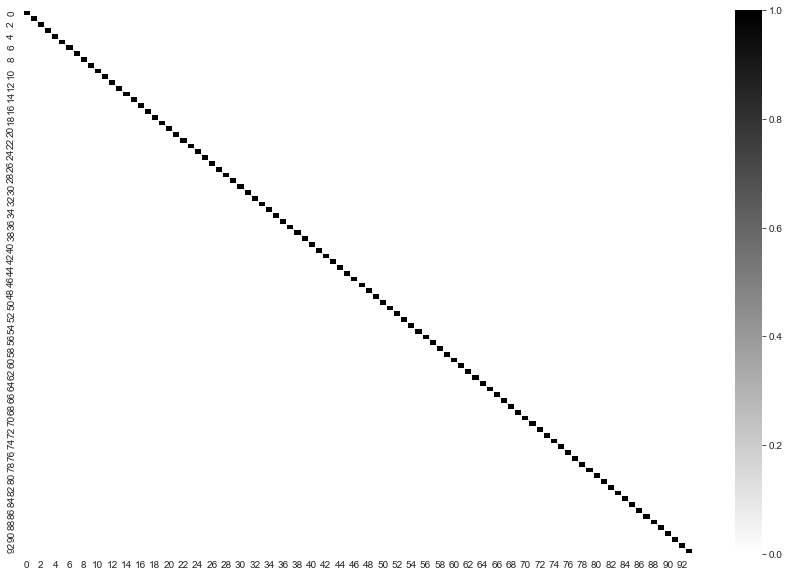

In [34]:
# Correlation Matrix

# Earlier we plot the raw data with correlation matrix and found signs of multicollinearity (samples that are identical)
# In PCA, all components have little / no correlation with one another.

# Get the transformed dataset
X_train_pca_df = pd.DataFrame(X_train_pca)

# plot 
fig = plt.figure(figsize=(15, 10))
sns.heatmap(X_train_pca_df.corr(), cmap = 'gray_r', linewidth = 0.005)


***
### PCA with 2 components

In [35]:
# Using PCA and reduce to 2 components to analyze
# PCA components are created and ranked in variance. 
# We use 2 components so as to analyze with a scatterplot in a 2 dimensional space.

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train_sm)

print(X_train_pca.shape)

print(X_train_sm.shape)

(9238, 2)
(9238, 94)


In [36]:
# create dataframe for plotting

x_pca_df=pd.DataFrame(data=X_train_pca,columns=['PC1','PC2'])

pca_df = pd.concat([x_pca_df, y_train_sm], axis = 1)
pca_df.head()

PC1       PC2  Bankrupt?
0  1.943190  5.234303          0
1 -1.036715  6.046540          0
2  6.030335  3.875440          0
3  1.218068  0.990430          0
4  3.038810 -2.263450          0

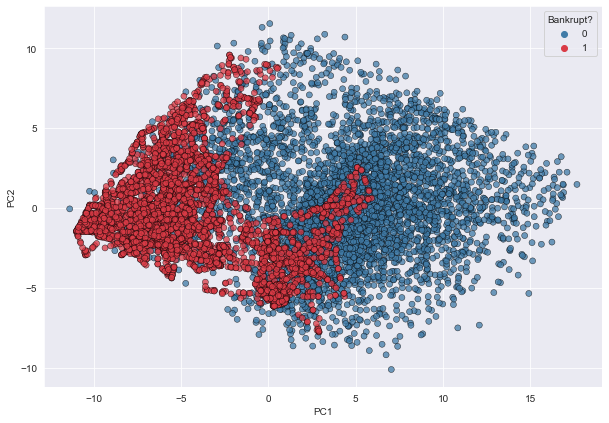

In [37]:
# In a 2 dimensional PC-space, we are able to better visualize if we are able to train a classifier with high accuracy. 
# This is akin to the earlier multiple scatterplot EDA but using PCA to help us visualize in a reduced simplified manner.

fig = plt.figure(figsize=(10,7))

sns.scatterplot(x=pca_df.PC1, y=pca_df.PC2, hue=pca_df['Bankrupt?'],alpha=0.75,edgecolor='black',linewidth=0.5)

Observations:  
The two classes aren't seperated clearly, there is clearly an overlap but we do see a pattern where class 1(bankrupt) leans to the left portion of the plot. 
Bankrupt is concentrated to the lower end of PC1 and almost uniformly across PC2.

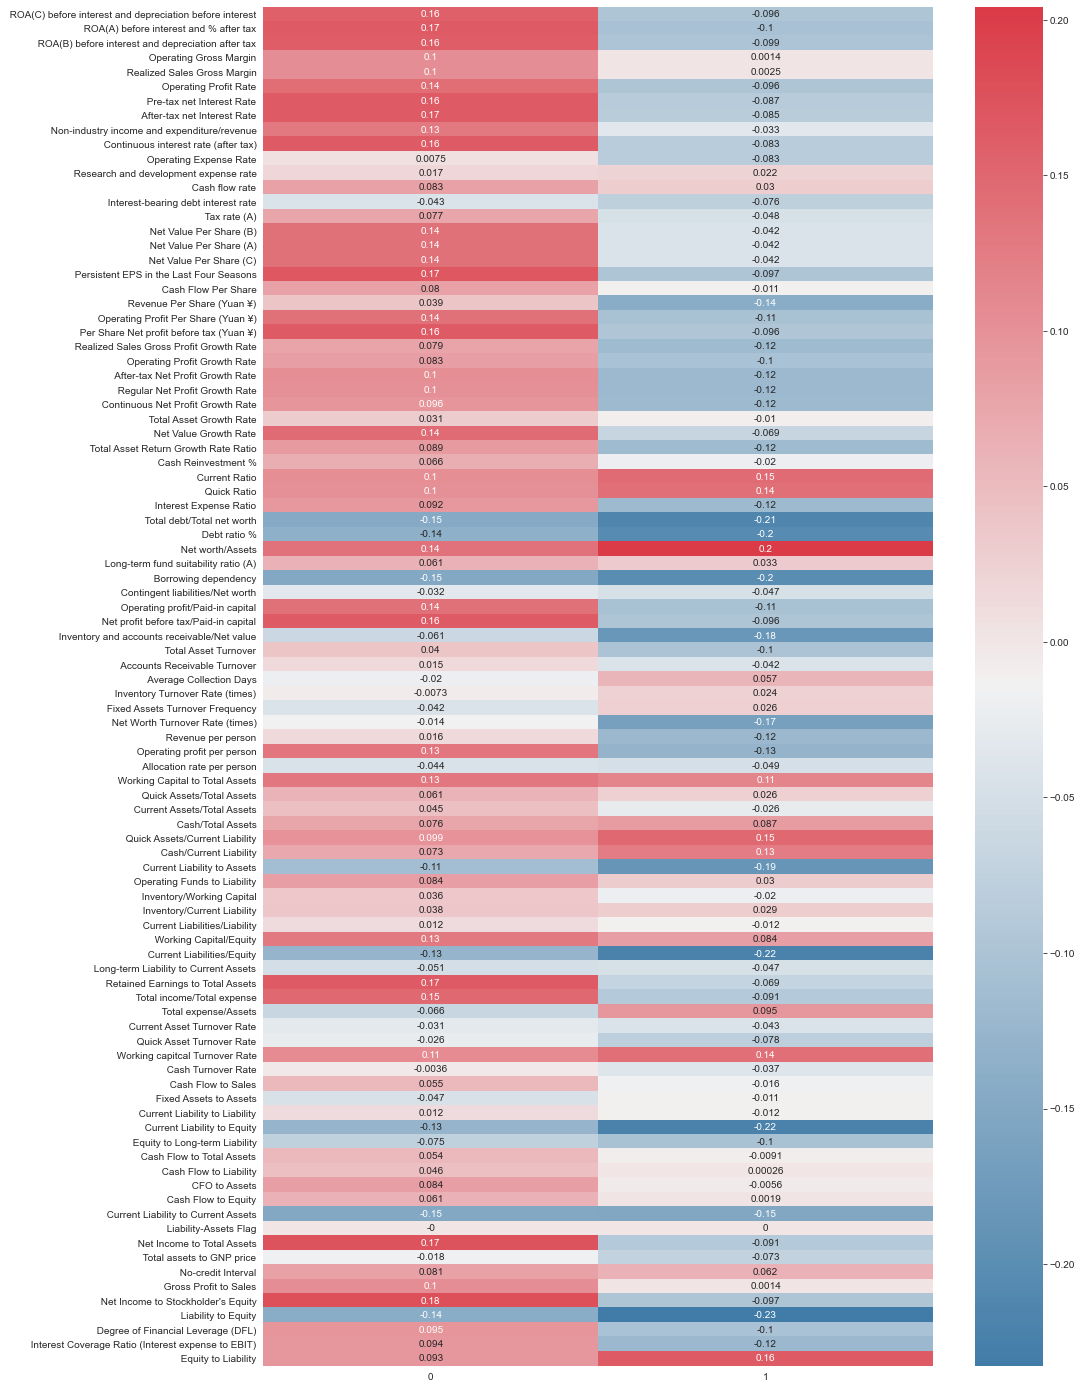

In [38]:
# heatmap plot to discover which features weight on each component for n_components
df_c = pd.DataFrame(pca.components_, columns=X.columns).T

# here we check on top 2, top_pc = 2

# adjust y-axis size dynamically
size_yaxis = 25    # round(X_train_pca.shape[1] * 0.5)
fig, ax = plt.subplots(figsize=(15,size_yaxis))
# plot the first top_pc components
top_pc = 3
sns.heatmap(df_c.iloc[:,:top_pc], annot=True, cmap = sns.diverging_palette(240, 10, as_cmap=True), ax=ax)
plt.show()

The above heatmap plots PC1 and PC2 and the features that are most correlated to the components, we can also see how PC1 and PC2 differs in how they feature the weights of all features and hence the reason why there are hardly any correlation between components. (with reference to the earlier correlation matrix)

In [39]:
# Factor loading analysis for 1st component

############### DEFINE PARAMS
top_k = 10
#select data based on percentile (top_q) or top-k features
top_q = .50
top_pc = 10
###############

# PCA factor loadings

print("Factor Loadings for the 1. component \n(explains {0:.2f} of the variance)".format(df_explained_variance.iloc[0,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

Factor Loadings for the 1. component 
(explains 0.36 of the variance)

Top 10 highest
----------------------------------------
 Net Income to Stockholder's Equity          0.176991
 Net Income to Total Assets                  0.173487
 Persistent EPS in the Last Four Seasons     0.168411
 ROA(A) before interest and % after tax      0.166347
 Retained Earnings to Total Assets           0.166223
 After-tax net Interest Rate                 0.165599
 Net profit before tax/Paid-in capital       0.164836
 Continuous interest rate (after tax)        0.164695
 Pre-tax net Interest Rate                   0.164682
 Per Share Net profit before tax (Yuan ¥)    0.163469
Name: 0, dtype: float64 

Top 10 lowest
----------------------------------------
 Borrowing dependency                  -0.149595
 Current Liability to Current Assets   -0.149153
 Total debt/Total net worth            -0.145949
 Liability to Equity                   -0.140803
 Debt ratio %                          -0.136407
 Curren

PC1 itself has an explained variance of 0.36% ( Which is around 1/3 of the whole dataset ), we can use it to study the highly correlated features and form some understanding of the features that are most relevant to the dataset.
>- Top 10 highest consist of features related to a company's profitability ( Net Income, EPS-Earnings per Share, Return of Assets, Earnings, Profit..)
>- Summary - Most factors weight towards positive, hence PC1 could be said to represent Profitability
***

In [40]:
# Factor loading analysis for 2nd component

############### DEFINE PARAMS
top_k = 10
#select data based on percentile (top_q) or top-k features
top_q = .50
top_pc = 10
###############

# PCA factor loadings

print("Factor Loadings for the 2. component \n(explains {0:.2f} of the variance)".format(df_explained_variance.iloc[1,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,1].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,1].sort_values()[:top_k])

Factor Loadings for the 2. component 
(explains 0.10 of the variance)

Top 10 highest
----------------------------------------
 Net worth/Assets                   0.204144
 Equity to Liability                0.163837
 Quick Assets/Current Liability     0.147961
 Current Ratio                      0.146048
 Working capitcal Turnover Rate     0.139989
 Quick Ratio                        0.139936
 Cash/Current Liability             0.125234
 Working Capital to Total Assets    0.114162
 Total expense/Assets               0.094897
 Cash/Total Assets                  0.086536
Name: 1, dtype: float64 

Top 10 lowest
----------------------------------------
 Liability to Equity                           -0.232679
 Current Liability to Equity                   -0.222364
 Current Liabilities/Equity                    -0.222364
 Total debt/Total net worth                    -0.213368
 Debt ratio %                                  -0.204144
 Borrowing dependency                          -0.200892


PC2 itself has an explained variance of 0.10% 
>- Top 10 lowest consist of features related to a company's liabilities ( Borrowing, liability, debt..)
>- Summary - Most factors weight towards negative, hence PC2 could be said to represent Liability

***


### Can we find any meaningful clusters?
High Level insights
>- K-Means Clustering  
>- DBSCAN
>- Affinity Propagation

### K-Means Clustering

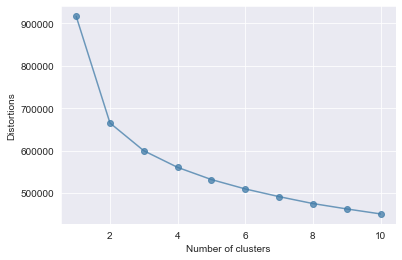

In [41]:
# Using k-means clustering

# Elbow method to find number of clusters

from sklearn.cluster import KMeans

distortions = [] # sum of squared error within the each cluster
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X_train_sm)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o', alpha=0.75)
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

Seems like after 3 clusters, it almost becomes linear.

In [42]:
# fit model

km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X_train_pca)

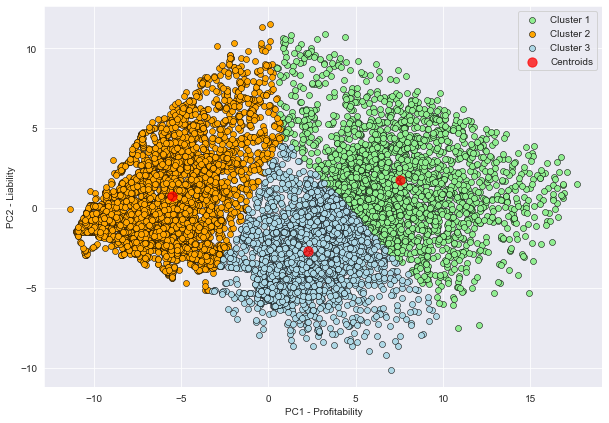

In [43]:
# Plot
fig = plt.figure(figsize=(10,7))

plt.scatter(X_train_pca[y_km==0, 0],
           X_train_pca[y_km==0, 1],
           c='lightgreen',
           edgecolors='black',
           linewidth=0.5, 
           label='Cluster 1')
plt.scatter(X_train_pca[y_km==1, 0],
           X_train_pca[y_km==1, 1],
           c='orange',
           edgecolors='black',
           linewidth=0.5, 
           label='Cluster 2')
plt.scatter(X_train_pca[y_km==2, 0],
           X_train_pca[y_km==2, 1],
           c='lightblue',
           edgecolors='black',
           linewidth=0.5, 
           label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=85,
           alpha=0.75,
           marker='o',
           c='red',
           label='Centroids')

plt.legend(loc='best')
plt.xlabel('PC1 - Profitability')
plt.ylabel('PC2 - Liability')
plt.show()

K-Means created 3 distinct clusters, based on PC1 - Profitability  / PC2 - Liability, we could probably look them as Low Risk, Med Risk, High Risk.

### DBSCAN

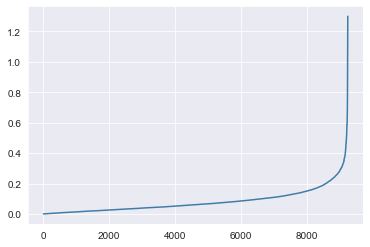

In [44]:
# Density based and captures similar points should be in dense clusters together.
# The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # to find suitable value for epsilon by calculating the distance to the nearest n points for each point.

# finding optimal value for epsilon

neigh = NearestNeighbors(n_neighbors=2)
neigh_model = neigh.fit(X_train_pca)

distances, indices = neigh_model.kneighbors(X_train_pca)    # kneighbours method return array of distance and index

# sort distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plot
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature, which is 0.3.

In [45]:
# minPts should be set as minPts ≥ D+1 (Simply, 2D will be 4.)
# If minPts=1, every data point will form a cluster by itself, means if we have n data, we gonna have n clusters.

dbs = DBSCAN(eps=0.3,
             min_samples=4)

# fit model

y_dbs = dbs.fit_predict(X_train_pca)

In [46]:
# Number of groups generated by DBSCAN

len(np.unique(dbs.labels_))

88

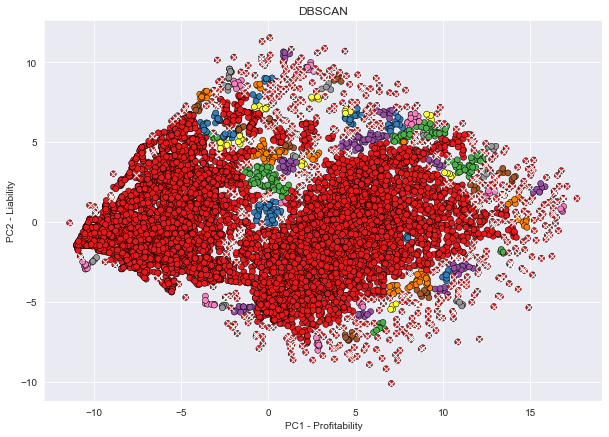

In [47]:
# Plot
fig = plt.figure(figsize=(10,7))


plt.scatter(X_train_pca[0:,0], X_train_pca[0:,1],
            c=y_dbs, 
            cmap='Set1',
            edgecolor='Black',
            linewidth=0.5,
            alpha=1)

plt.scatter(X_train_pca[y_dbs==-1, 0],    # deemed by DBSCAN as outliers
           X_train_pca[y_dbs==-1, 1],
           c='white',
           marker='x',
           linewidth=1, 
           label='Outliers')

plt.title("DBSCAN")
plt.xlabel('PC1 - Profitability')
plt.ylabel('PC2 - Liability')
plt.show()

DBSCAN created 88 clusters, to effectively identify these clusters would require domain knowledge and expertise ( especially in Taiwanese companies)  
We can use DBSCAN as an outlier detection algorithm becuase points that do not belong to any cluster get their own class: -1. These are represented with white X marks.

### Affinity Propagation

In [48]:
# Using Affinity Propagation

# time complexity is a main drawback of AffinityPropagation ( about 15mins to process for this scenario)

# parameters were experimented to balance model convergence and processing time

from sklearn.cluster import AffinityPropagation

afprop  = AffinityPropagation(random_state=1, max_iter=2000, convergence_iter=200, damping=0.90, preference=-1000)

# fit model

afprop.fit(X_train_pca)

labels = afprop.predict(X_train_pca)

In [49]:
# Check number of clusters

n_clusters_ = len(afprop.cluster_centers_indices_)

print("Number of Clusters: ",n_clusters_)

Number of Clusters:  22


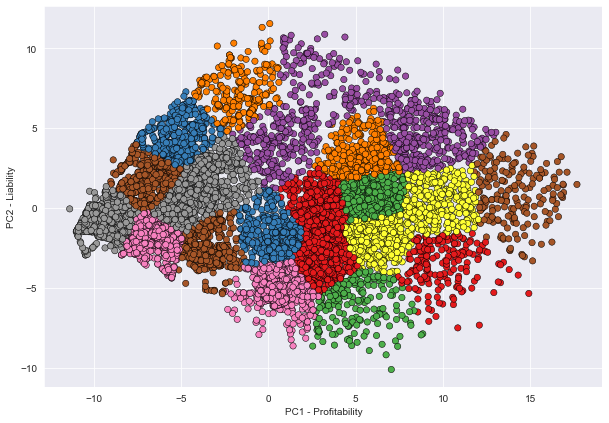

In [50]:
# Plot

fig = plt.figure(figsize=(10,7))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
            c=labels, 
            s=40, 
            cmap='Set1',
            edgecolor='black',
            linewidth=0.5,
            alpha=1            
           )


plt.xlabel('PC1 - Profitability')
plt.ylabel('PC2 - Liability')
plt.show()

Again, with these 10 clusters, it's hard to draw conclusions what these clusters would represent without domain knowledge and expertise ( especially in Taiwanese companies) They may well represent company industries / regional clusters.
***

### K-Means Clustering
<table><tr>
<td> <img src="images/scatter merge.jpg" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="images/scatter merge 2.jpg" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

If bank would like to identify companies with potential in the High and Med risk clusters, we could see an area of potential.
***

### DBSCAN
<img src="images/scatter merge 3.jpg" alt="Drawing" style="width: 500px;"/>

DBSCAN is able to identify even smaller clusters for companies with the same potential.
***

### Train model with PCA coverage of 95% variance. 
Earlier, we concluded that 33 components will account for 0.952542% of explained variance.  
*sidenote:* We can also keep experimenting the number of components until model scores doesn't drop.

In [51]:
# Initialize and compute pca for 33 components to account for 95% of explained variance

n_components = 33

pca = PCA(n_components=n_components)
pca.fit(X_train_sm)

X_train_reduced = pd.DataFrame(pca.transform(X_train_sm), index=X_train_sm.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

# initialise Logistic Regression model with basic parameters with SMOTE
logreg3 = LogisticRegression(random_state = 1,max_iter=1000)
logreg3.fit(X_train_reduced, y_train_sm)
y_pred = logreg3.predict(X_test_reduced)
y_pred_proba = logreg3.predict_proba(X_test_reduced)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# Print key metrics      
print("Accuracy:", logreg3.score(X_test_reduced, y_test))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

Accuracy: 0.8885630498533724
F1: 0.3254437869822485
Recall: 0.8333333333333334
Precision: 0.20220588235294118

CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision     0.993799   0.202206  0.888563     0.598003      0.968264
recall        0.890404   0.833333  0.888563     0.861869      0.888563
f1-score      0.939265   0.325444  0.888563     0.632354      0.919464
support    1980.000000  66.000000  0.888563  2046.000000   2046.000000


In [52]:
# With 33 components of an explained variance of 95% from original dataset, we can see a slight improvement even though we are using much lesser data.
# From 94 features to 33 features (improvement may be due to overfitting in the first instance)
# We are able to increase the predictive metrics of 1 (Bankrupt) when comparing with experiment 2. 
# Recall score from 0.712121 to 0.833333! without any sacrifice of precision as well. (in fact it also increased precision ever so slightly)

# Experiment (2)
# CLASSIFICATION REPORT:
#                      0          1  accuracy    macro avg  weighted avg
# precision     0.989397   0.185039  0.889541     0.587218      0.963450
# recall        0.895455   0.712121  0.889541     0.803788      0.889541
# f1-score      0.940085   0.293750  0.889541     0.616917      0.919235
# support    1980.000000  66.000000  0.889541  2046.000000   2046.000000

# Experiment (4)  
Perform Hyperparameter tuning of logistic model for Recall score.
>- 1) Handling imbalance of data [✓]
>- 2) Dimensionality Reduction. [✓]
>- 3) Tuning of model [✓]

In [53]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Regression model, using GridSearch with Cross Validation, k-fold: 5, scoring to priotise recall score

# initialise Logistic Regression model for hypertuning
logreg4 = LogisticRegression()

# logistic regression params
params = {"penalty": ['l1','l2','elasticnet','none' ],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter': [100, 1000, 2500, 5000]
         }

# Create GridSearchCV object
Grid_logreg4 = GridSearchCV(estimator = logreg4, 
                            param_grid = params, 
                            scoring = 'recall',    #'roc_auc' or 'f1' may be experimented too
                            cv = 5, 
                            verbose=True, 
                            n_jobs=-1)

# fit data
grid_result = Grid_logreg4.fit(X_train_reduced, y_train_sm)


print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
Best Score:  0.9294210484351331
Best Params:  {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Public\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.86945332 ...        nan 0.92530803 0.92530803]
  warnings.warn(


In [54]:
best_est_reg = grid_result.best_estimator_
y_pred = best_est_reg.predict(X_test_reduced)
y_pred_proba = best_est_reg.predict_proba(X_test_reduced)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

In [55]:
# Print key metrics      
print("Accuracy:", best_est_reg.score(X_test_reduced, y_test))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

Accuracy: 0.8704789833822092
F1: 0.29708222811671087
Recall: 0.8484848484848485
Precision: 0.18006430868167203

CLASSIFICATION REPORT:
                     0          1  accuracy    macro avg  weighted avg
precision     0.994236   0.180064  0.870479     0.587150      0.967973
recall        0.871212   0.848485  0.870479     0.859848      0.870479
f1-score      0.928668   0.297082  0.870479     0.612875      0.908294
support    1980.000000  66.000000  0.870479  2046.000000   2046.000000


In [56]:
# Increase in recall score but decrease in precision and f1-score

# Experiment (3)
# CLASSIFICATION REPORT:
#                      0          1  accuracy    macro avg  weighted avg
# precision     0.993803   0.202952  0.889052     0.598377      0.968292
# recall        0.890909   0.833333  0.889052     0.862121      0.889052
# f1-score      0.939547   0.326409  0.889052     0.632978      0.919769
# support    1980.000000  66.000000  0.889052  2046.000000   2046.000000

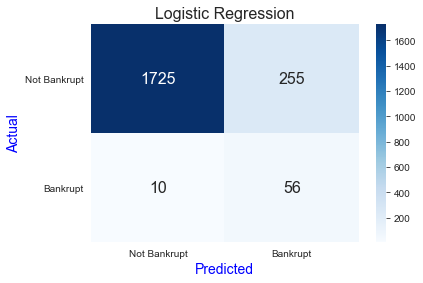

In [57]:
# Plot Confusion Matrix heatmap
heat_cm = confusion_matrix(y_test, y_pred)
class_names = ["Not Bankrupt","Bankrupt"]
df_cm = pd.DataFrame(heat_cm, index=class_names, columns=class_names)

sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')
plt.yticks(rotation=0) 
plt.xlabel('Predicted', fontsize=14,color="Blue")
plt.ylabel('Actual', fontsize=14,color="Blue")
plt.title('Logistic Regression', fontsize = 16 )
plt.show()

In [58]:
# Out of 66 bankrupt cases, we identified 56, recall score of 0.848485.

# With the iterative process of tweaking the model, we have managed to predict companies that are bankrupt fairly well, but at a cost of the high rate of 
# Type I errors, this trade off for this business question is probably necessary for the stakeholders to make decisions. 

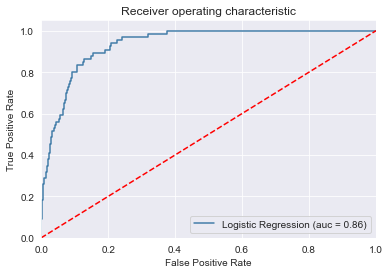

In [59]:
# plot ROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Decent looking curve with AUC of 0.86, True Positive Rate / Recall was given priority during modelling hence the score.  
However, we would need to use a Preicison-Recall curve to reflect more accurately.

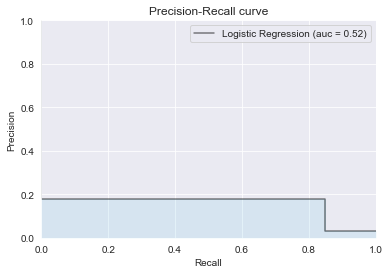

In [60]:
#Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# calculate precision-recall AUC
auc_prc = auc(recall, precision)


# plot
plt.step(recall, precision, color='black', alpha=0.5, where='post',label='Logistic Regression (auc = %0.2f)' % auc_prc)
plt.fill_between(recall, precision, alpha=0.2, color='skyblue', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="upper right")
plt.show()

Precision Recall Curve visually tells us how much we have sacrificed Precision for Recall.

***
### Closing Note:  

At the end, Logistic Regression might not be the best model for this classification problem. We can implement a pipeline to test several models and find the best fitting model. (One that has a better balance of Precision and Recall)

PCA is able to help with reduced dimensionality and still improve our performance metric scores from logistic regression model.  

As compared to methods like feature selection (RFE, Recursive Feature Elimination), it does not specifically take away any features from the raw dataset, but combines features in terms of variance and presents them as NEW features as Principle Components.  

Clustering depends heavily on the distribution of the data points and that it is always worth trying out several cluster algorithms.


